# Part I - Fordgo_bike_trip_data

## by Kanyinsola Diyan

## Introduction
> The Fordgo bike trip dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
> The dataset was downloaded from the Project page of Udacity Data analyst nanodegree program.
> The dataset will be explored programmatically to discover insights needed for the bike-sharing system to make data-driven decisions.

## Preliminary Wrangling

In [1]:
#import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#view the first five rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of the dataset?

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df['bike_id'].nunique()

4646

In [6]:
#check for duplicated rows
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> The dataset has 183,412 rows and 16 columns.
> There are no duplicated rows

### Descriptive Statistics

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### There is a need to change the datatypes of some columns into appropriate ones
- start_station_id: from int to object
- start_station_latitude: from float to object
- start_station_longitude: from float to object
- end_station_id: from int to object
- end_station_latitude: from float to object
- end_station_longitude: from float to object
- bike_id: from float to object
- member_birth_year: float to object

> Also, the start_time and end_time columns should be converted to datetime datatype

In [9]:
#donvert to object datatype
df['start_station_id'] = df['start_station_id'].astype(object)
df['start_station_latitude'] = df['start_station_latitude'].astype(object)
df['start_station_longitude'] = df['start_station_longitude'].astype(object)


In [10]:
#convert to object datatype
df['end_station_id'] = df['end_station_id'].astype(object)
df['end_station_latitude'] = df['end_station_latitude'].astype(object)
df['end_station_longitude'] = df['end_station_longitude'].astype(object)
df['bike_id'] = df['bike_id'].astype(object)
df['member_birth_year'] = df['member_birth_year'].astype(object)

In [11]:
#convert to datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [12]:
#test
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude             object
start_station_longitude            object
end_station_id                     object
end_station_name                   object
end_station_latitude               object
end_station_longitude              object
bike_id                            object
user_type                          object
member_birth_year                  object
member_gender                      object
bike_share_for_all_trip            object
dtype: object

> The datatypes have been corrected where necessary. The features will be explored appropriately below

## Univariate Exploration

### How is the distribution of the duration column?

In [13]:
def plot_label(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

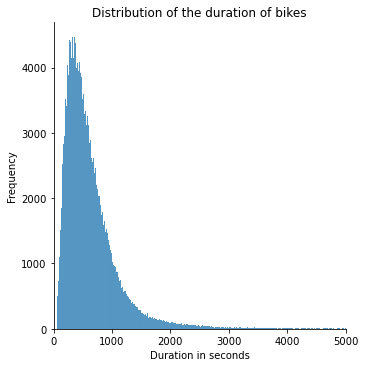

In [15]:
#create a distplot with the duration column
sns.displot(data=df, x='duration_sec')
plot_label('Distribution of the duration of bikes', 'Duration in seconds', 'Frequency')
plt.xlim(0, 5000);

> The distribution is right-skewed and the outliers are on the high end.

### How well do the outliers affect the distribution?

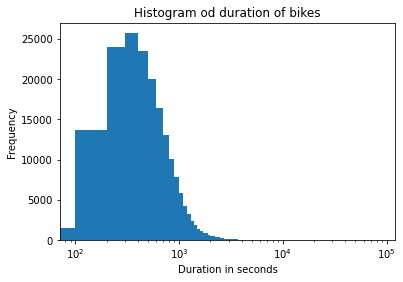

In [16]:
#create a histogram with the duration column with a transformed x-axis
bins = np.arange(0, df['duration_sec'].max()+100, 100)
plt.hist(data=df, x='duration_sec', bins=bins)
plot_label('Histogram od duration of bikes','Duration in seconds', 'Frequency')
plt.xscale('log');

> With the transformed x-axis, the skewness is much steeper than the previous visualization. There is definitely something about the outliers.

### What is the distribution of the users of the bike-sharing system?

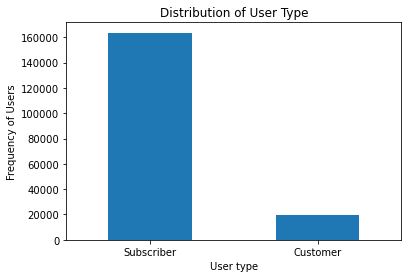

In [17]:
#create a bar chart with the user_type column
df['user_type'].value_counts().plot(kind='bar')
plot_label('Distribution of User Type', 'User type', 'Frequency of Users')
plt.xticks(rotation=0);

> This chart shows that subscribers use the bike-share system more frequently than the customers. Hence, there are more subscriber users than the customers. 89% of the users of the bike-share system are subscribers while 11% of the users are customers.

In [18]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [19]:
df['user_type'].value_counts(normalize=True)

Subscriber    0.891676
Customer      0.108324
Name: user_type, dtype: float64

### What is the distribution of the year of birth of users?

In [25]:
#order the years in ascending order
df['member_birth_year'] = df['member_birth_year'].astype(str).str.split('.').str[0]
year = df.groupby('member_birth_year')['duration_sec'].mean().index

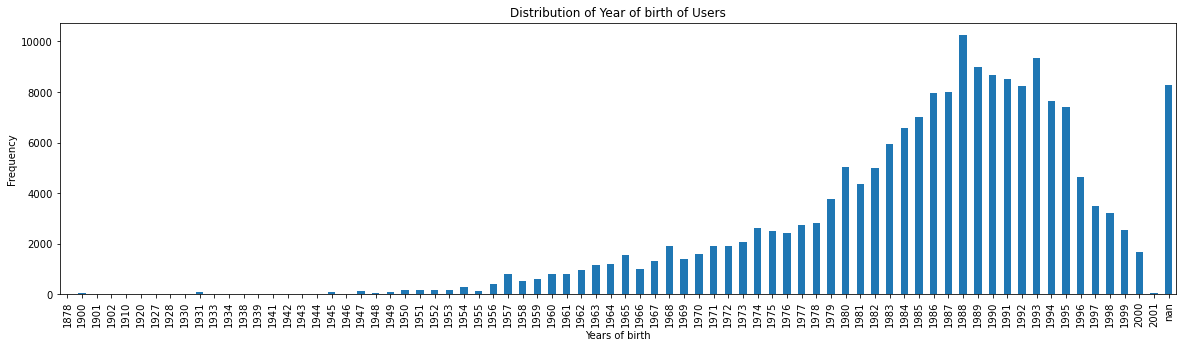

In [34]:
#create a bar chart with the member_birth_year
plt.figure(figsize=[20,5])
year_plot = df['member_birth_year'].value_counts().reindex(year)
year_plot.plot(kind='bar')
plot_label('Distribution of Year of birth of Users', 'Years of birth', 'Frequency')
plt.xticks(rotation=90);

> From the chart above, we can clearly see that 1988 has the highest number of users while 1993 has the second highest. There is a steady increase of users born in 1945 to the peak of those born in 1988. After which there is a gradual decrease in the number of users from 1989 till 2001 except for 1993. This is an interesting insight.

### What is the distribution of the gender of the users?

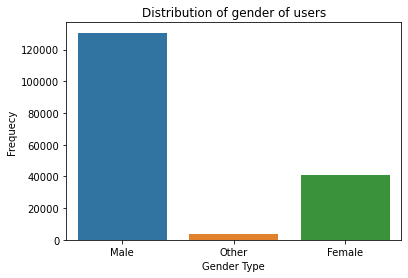

In [35]:
#create a barchart of the gender column
sns.countplot(data=df, x='member_gender')
plot_label('Distribution of gender of users', 'Gender Type', 'Frequecy');

In [37]:
df['member_gender'].value_counts(normalize=True)

Male      0.745951
Female    0.233198
Other     0.020851
Name: member_gender, dtype: float64

> The chart above shows that there are more of the male gender using the bike-sharing system. 75% of the users are male, 23% are female while 2% belong to the other gender type.

### What is the distribution of the bikes that are bike_share_for_all_trip?

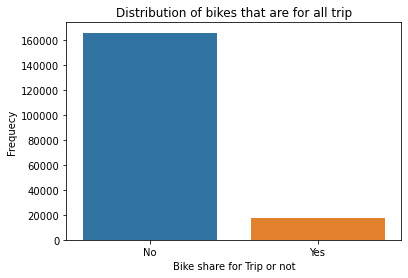

In [38]:
#create a barchart with the bike_share_for_all_trip column
sns.countplot(data=df, x='bike_share_for_all_trip')
plot_label('Distribution of bikes that are for all trip', 'Bike share for Trip or not', 'Frequecy');

In [39]:
df['bike_share_for_all_trip'].value_counts(normalize=True)

No     0.905355
Yes    0.094645
Name: bike_share_for_all_trip, dtype: float64

> The chart above shows clearly that most bikes are not shared for all trips. 90% of bike-share are not for all trips.

## Bivariate Exploration

### How does the user type affect the duration of use?

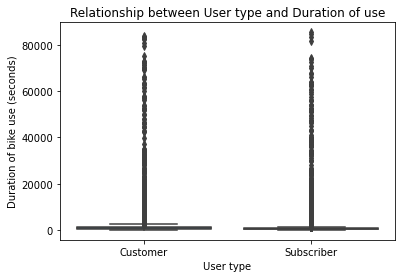

In [40]:
sns.boxplot(data=df, x='user_type', y='duration_sec')
plot_label('Relationship between User type and Duration of use', 'User type', 'Duration of bike use (seconds)');

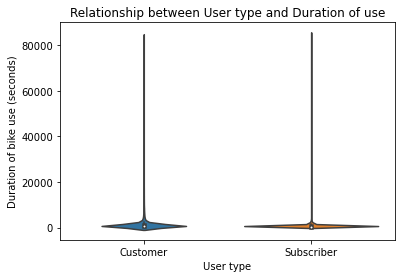

In [41]:
sns.violinplot(data=df, x='user_type', y='duration_sec')
plot_label('Relationship between User type and Duration of use', 'User type', 'Duration of bike use (seconds)');

> These plots above infer that the both user types spend a lot of time using the bikes. However, Subscribers have slightly higher values of outliers than customers. It could be inferred that both user types spend closely the same duration spent in using bikes.

### How does the gender of the users affect the duration of bike use?

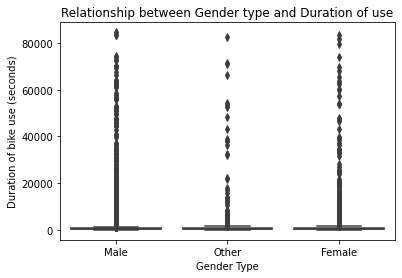

In [42]:
sns.boxplot(data=df, x='member_gender', y='duration_sec')
plot_label('Relationship between Gender type and Duration of use', 'Gender Type', 'Duration of bike use (seconds)');

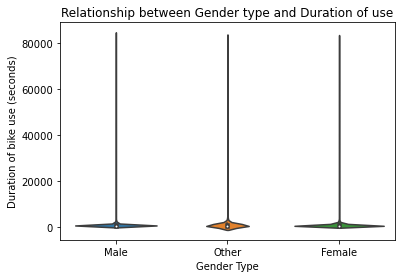

In [43]:
sns.violinplot(data=df, x='member_gender', y='duration_sec')
plot_label('Relationship between Gender type and Duration of use', 'Gender Type', 'Duration of bike use (seconds)');

> These charts show how long the various gender types use the bikes. They spend similarly long durations on bikes as they have high outliers on the boxplots and violin plots.

### How does the bike_share_for_all_trip column affect the duration?

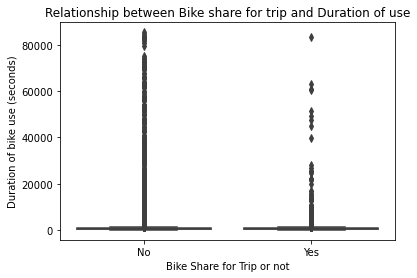

In [45]:
sns.boxplot(data=df, x='bike_share_for_all_trip', y='duration_sec')
plot_label('Relationship between Bike share for trip and Duration of use', 'Bike Share for Trip or not','Duration of bike use (seconds)');

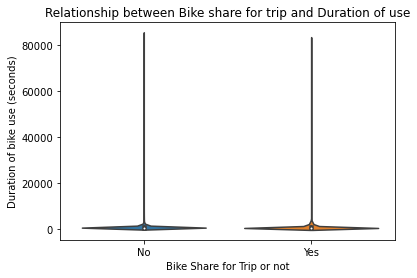

In [46]:
sns.violinplot(data=df, x='bike_share_for_all_trip', y='duration_sec')
plot_label('Relationship between Bike share for trip and Duration of use', 'Bike Share for Trip or not','Duration of bike use (seconds)');

> The bike share for all trip has a smaller number of outliers. This infers that averagely, the bike-share for all trip has smaller durations than the bike-share not for all trip.

In [47]:
df.groupby('bike_share_for_all_trip')['duration_sec'].mean()

bike_share_for_all_trip
No     730.454253
Yes    684.220174
Name: duration_sec, dtype: float64

### What is the distribution of the gender in the user type?

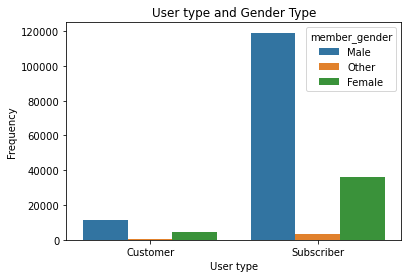

In [48]:
sns.countplot(data=df, x='user_type', hue='member_gender')
plot_label('User type and Gender Type', 'User type', 'Frequency');

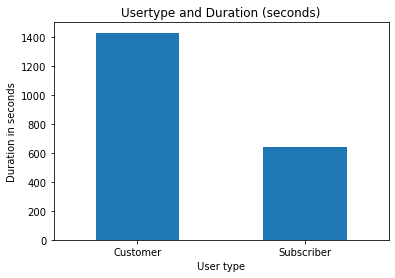

In [50]:
df.groupby('user_type')['duration_sec'].mean().plot.bar()
plot_label('Usertype and Duration (seconds)', 'User type', 'Duration in seconds')
plt.xticks(rotation=0);

> The average duration of customers is more than that of the subscribers. We can infer that the customers tend to use the bike for a long period of time. Earlier, we realized that bike for all trip has smaller duration. We can infer that customers use the bike-share not for all trip, hence, the high average duration. Let us find out if our inference is true.

### What is the proportion of the user type that use the bike for all trip?

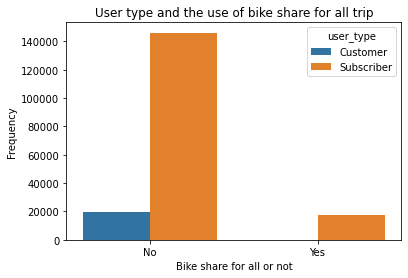

In [51]:
sns.countplot(data=df, x='bike_share_for_all_trip', hue='user_type')
plot_label('User type and the use of bike share for all trip', 'Bike share for all or not', 'Frequency');

> It seems our inference is true. Only subscribers used the bike-share for all trip. That is, no customer was allowed to use the bike-share for all trip. This makes me want to infer that Bike-share for all trip is strictly acessed by subscribers.

In [52]:
df.groupby('user_type')['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,19868.0,1432.465019,3861.314330,62.0,504.0,792.0,1263.0,83772.0
Subscriber,163544.0,640.263678,1315.976912,61.0,312.0,490.0,750.0,85444.0


> Averagely, customers spend more time in bike use than subscribers.

### How are the user_types distributed in various stations?

In [53]:
df['start_station_id'].nunique()

329

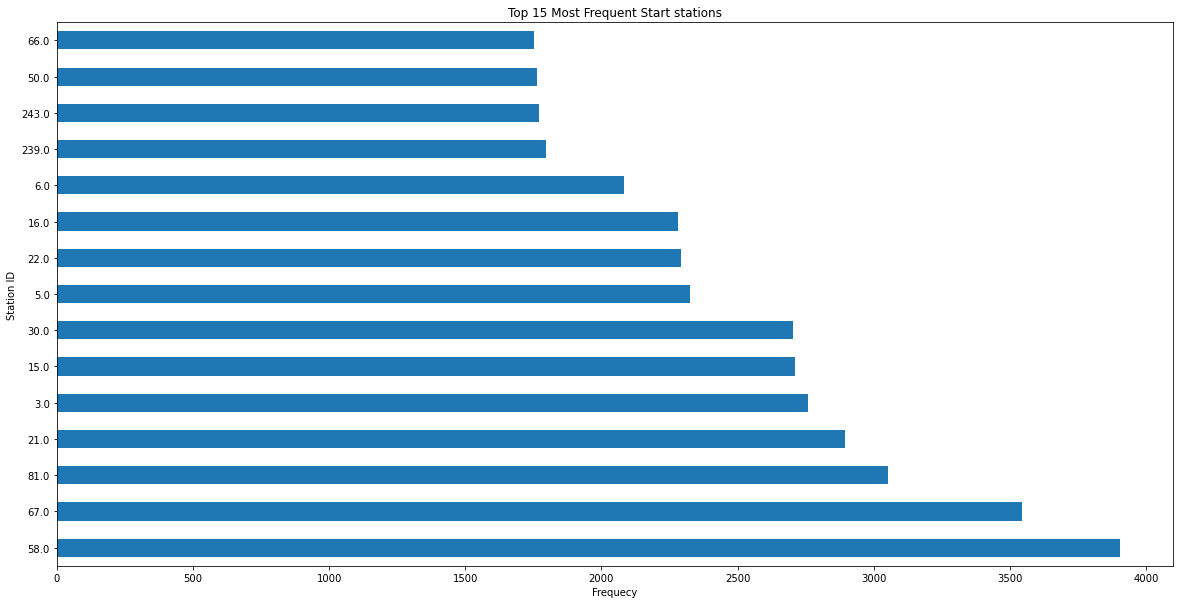

In [54]:
plt.figure(figsize=[20,10])
df['start_station_id'].value_counts().sort_values(ascending=False).nlargest(15).plot(kind='barh')
plot_label('Top 15 Most Frequent Start stations', 'Frequecy', 'Station ID');

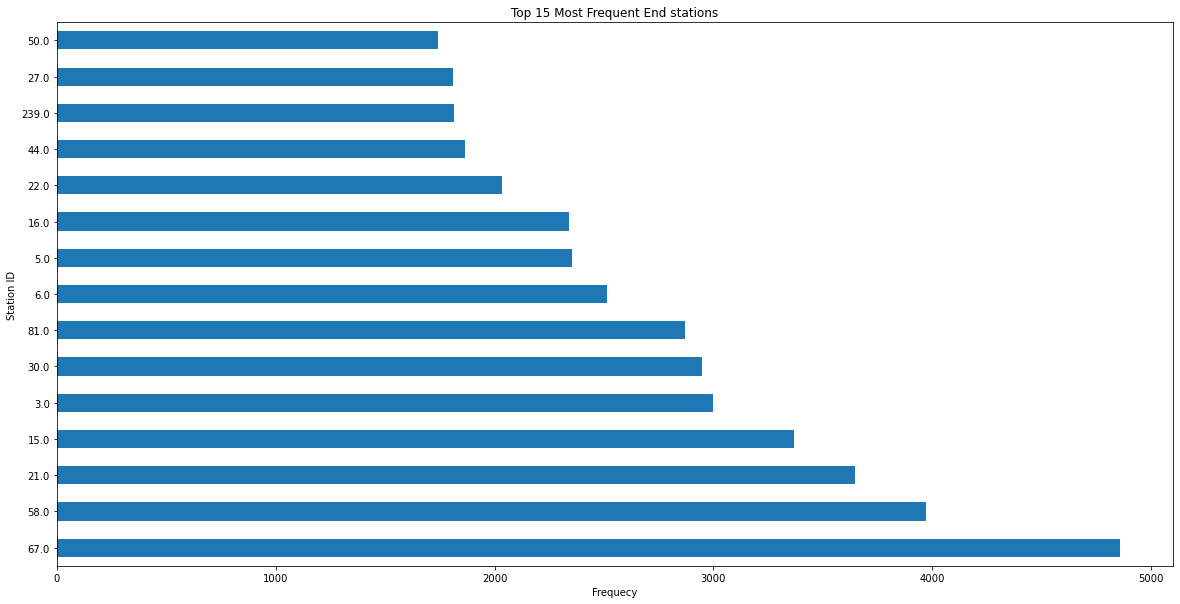

In [55]:
plt.figure(figsize=[20,10])
df['end_station_id'].value_counts().sort_values(ascending=False).nlargest(15).plot(kind='barh')
plot_label('Top 15 Most Frequent End stations', 'Frequecy', 'Station ID');

In [56]:
df['start_station_id'].value_counts().tail(10)

225.0    18
234.0    18
388.0    17
398.0    17
389.0    13
301.0     9
51.0      7
300.0     4
224.0     4
344.0     2
Name: start_station_id, dtype: int64

In [57]:
df['end_station_id'].value_counts().tail(10)

225.0    20
226.0    19
228.0    16
398.0    12
389.0    11
51.0      9
300.0     7
344.0     6
224.0     6
301.0     5
Name: end_station_id, dtype: int64

- Most frequently used start station is station id 58.0
- Most frequently used end station is station id 67.0

- While the least frequently used start station is station id 344.0
- The least frequently used end station is station id 301.0

### How does the year of birth affect the duration?

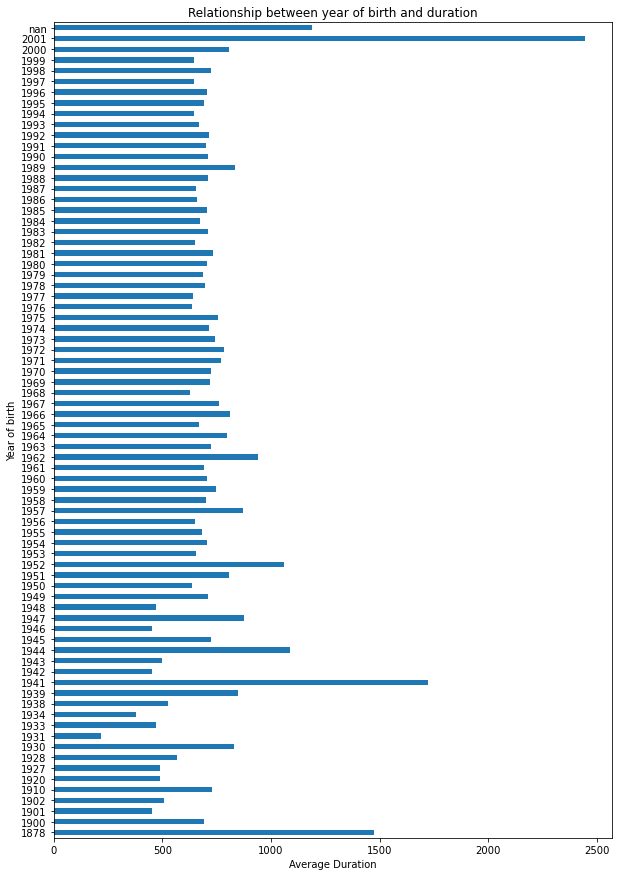

In [59]:
plt.figure(figsize=[10,15])
df.groupby('member_birth_year')['duration_sec'].mean().plot(kind='barh')
plot_label('Relationship between year of birth and duration', 'Average Duration', 'Year of birth');

In [60]:
df.groupby('member_birth_year')['user_type'].value_counts().head(30)

member_birth_year  user_type 
1878               Customer        1
1900               Subscriber     49
                   Customer        4
1901               Subscriber      6
1902               Subscriber     11
1910               Subscriber      1
1920               Subscriber      3
1927               Subscriber      1
1928               Customer        1
1930               Customer        1
1931               Subscriber     89
1933               Subscriber     20
1934               Customer        2
1938               Subscriber      3
1939               Subscriber      7
                   Customer        4
1941               Subscriber      9
1942               Subscriber     21
1943               Subscriber     30
1944               Customer        1
                   Subscriber      1
1945               Subscriber    103
                   Customer        2
1946               Subscriber     19
1947               Subscriber    133
                   Customer        2
1948    

In [45]:
df.groupby('member_birth_year')['user_type'].value_counts().tail(30)

member_birth_year  user_type 
1988               Subscriber    9293
                   Customer       943
1989               Subscriber    7898
                   Customer      1074
1990               Subscriber    7773
                   Customer       885
1991               Subscriber    7670
                   Customer       828
1992               Subscriber    7471
                   Customer       779
1993               Subscriber    8702
                   Customer       623
1994               Subscriber    7034
                   Customer       626
1995               Subscriber    6805
                   Customer       618
1996               Subscriber    4137
                   Customer       503
1997               Subscriber    3125
                   Customer       356
1998               Subscriber    2893
                   Customer       315
1999               Subscriber    2278
                   Customer       250
2000               Subscriber    1401
                   C

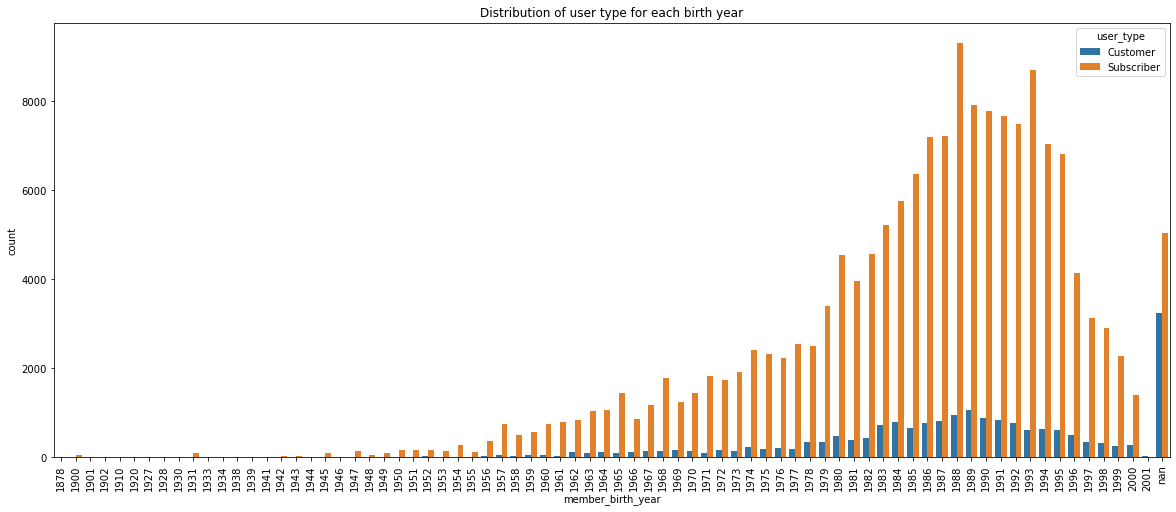

In [62]:
plt.figure(figsize=[20,8])
sns.countplot(data=df, x='member_birth_year', hue='user_type', order=year)
plt.title('Distribution of user type for each birth year')
plt.xticks(rotation=90);

> There are more subscribers than customers in every year. However, 2001 records only customers as seen on the chart.

# Multivariate Exploration

## What is the relationship between Duration, User type and Gender type?

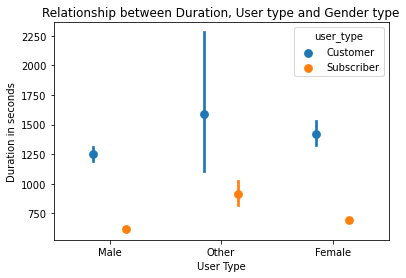

In [69]:
sns.pointplot(data=df, x= 'member_gender', y='duration_sec', hue='user_type', dodge=0.3, linestyles= "")
plot_label('Relationship between Duration, User type and Gender type', 'User Type', 'Duration in seconds');

- Male subscribers have a smaller duration than male customers.
- Female subscribers also have a smaller average duration than female customers.
- Customers of the other gender type seem to spend longer duration using the bikes than the subscribers counterpart.

We can infer that the customers of the other gender type spend more time using bikes than others while the male subscribers spend the least time in using the bikes.

## What is the relationship between Duration , User type and Bike share for all Trip?

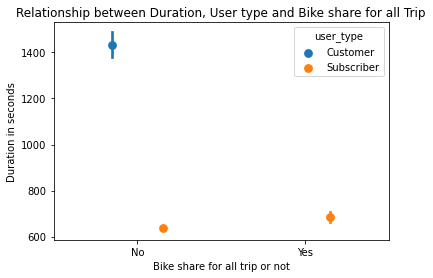

In [68]:
sns.pointplot(data=df, x= 'bike_share_for_all_trip', y='duration_sec', hue='user_type', dodge=0.3, linestyles= "")
plot_label('Relationship between Duration, User type and Bike share for all Trip', 'Bike share for all trip or not', 'Duration in seconds');

> Only subscribers are allowed to use the bike share for all trip.
> Customers that do not use bike share for all trip have a high average duration in the bike use.


In conclusion, customers spend a longer duration with the bikes than subscribers especially customers of the **other gender type.**